In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
columns = ["ID", "recommender", "intelligent", "learning", "school", "Label"]
data = np.array([[1,1,1,1,0,1],[2,0,0,1,1,0],[3,1,1,0,0,1],[4,1,0,1,1,1],[5,0,0,0,1,0]])
df = pd.DataFrame(data, columns=columns)
df

,ID,recommender,intelligent,learning,school,Label
0,1,1,1,1,0,1
1,2,0,0,1,1,0
2,3,1,1,0,0,1
3,4,1,0,1,1,1
4,5,0,0,0,1,0


In [57]:
def cond_probability(prior, posterior, item_value = 1):
    filtered_data = df[df[posterior] == item_value]
    return filtered_data[prior].sum() / filtered_data.shape[0]

In [69]:
cond_probability("school", "Label", 1)


0.3333333333333333

In [94]:
def calculate_class_probability(posterior, item_value):
    smoothing_value = 0.01
    probabilities = np.zeros(df.columns[1:].shape[0]) + smoothing_value
    for i, c in enumerate(df.columns[1:]):
        probabilities[i] += cond_probability(c, posterior, item_value)
    print(probabilities)
    return np.prod(probabilities)

In [102]:
def predict_class(posterior):
    positive_prob = calculate_class_probability(posterior, 1)
    print(positive_prob)
    negative_prob = calculate_class_probability(posterior, 0)
    print(negative_prob)

    if positive_prob > negative_prob:
        return 1
    else:
        return 0

In [105]:
predict_class("school")

[0.34333333 0.01       0.67666667 1.01       0.34333333]
0.0008056160259259259
[1.01 1.01 0.51 0.01 1.01]
0.005254535100000001


0

### Add logarithmic summing

In [121]:
x = np.linspace(0.01,2,200)
values = -np.log2(x)

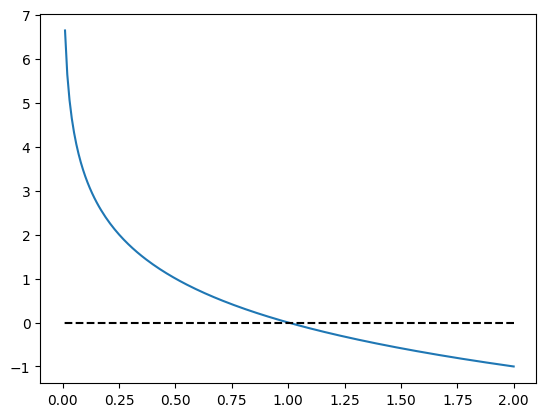

In [164]:
plt.plot(x, values)
plt.plot([2,0],[0,0], 'k--')

In [193]:
def calculate_class_log_probability(posterior, item_value):
    smoothing_value = 0.01
    probabilities = np.zeros(df.columns[1:].shape[0])
    for i, c in enumerate(df.columns[1:]):
        probabilities[i] -= np.log2(cond_probability(c, posterior, item_value) + smoothing_value)
    print(probabilities)
    return 2**(-np.sum(probabilities))

In [194]:
def predict_log_class(posterior):
    positive_prob = calculate_class_log_probability(posterior, 1)
    print(positive_prob)
    negative_prob = calculate_class_log_probability(posterior, 0)
    print(negative_prob)

    if positive_prob > negative_prob:
        return 1
    else:
        return 0

In [195]:
predict_log_class("Label")

[-0.01435529  0.56348277  0.56348277  1.54231816 -0.01435529]
0.16036451824814807
[ 6.64385619  6.64385619  0.97143085 -0.01435529  6.64385619]
5.151000000000004e-07


1